In [1]:
import pandas as pd
import seaborn as sns  
import matplotlib
import matplotlib.pyplot as plt  
%matplotlib inline
df = pd.read_csv('ofertas_relampago.csv').sort_values('OFFER_START_DATE')
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
40515,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-02 01:00:38+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-SOFA_AND_FUTON_COVERS
40352,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:10+00:00,lightning_deal,5,3,4.87,2.0,NaN,none,COMPUTERS,CE,MLM-DATA_CABLES_AND_ADAPTERS
40351,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-02 01:00:00+00:00,lightning_deal,7,7,NaN,NaN,NaN,free_shipping,MOBILE,CE,MLM-MOBILE_DEVICE_CHARGERS
40350,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 13:00:01+00:00,lightning_deal,10,10,NaN,NaN,NaN,none,MOBILE,CE,MLM-CELLPHONE_ACCESSORIES
40349,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,MOBILE,CE,MLM-CELLPHONE_ACCESSORIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24034,2021-07-31,2021-07-31 07:00:00+00:00,2021-07-31 12:50:39+00:00,lightning_deal,5,0,4.86,5.0,NaN,none,SPORTS,APP & SPORTS,MLM-BICYCLE_LIGHTS
24035,2021-07-31,2021-07-31 07:00:00+00:00,2021-07-31 13:00:05+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-JACKETS_AND_COATS
24036,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:03+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-JACKETS_AND_COATS
24029,2021-07-31,2021-07-31 12:00:00+00:00,2021-07-31 20:00:00+00:00,lightning_deal,25,25,NaN,NaN,A,free_shipping,SPORTS,APP & SPORTS,MLM-BICYCLES


# Carga y exploración de datos

Utilizamos un dataset que tiene información de las ofertas realizadas en un intervalo de dos meses en Argentina. 
Analizamos los tipos de datos que hay en cada columna, nos deshacemos de las que no aportan información nueva y completamos aquellos valores nulos según corresponda.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48746 entries, 40515 to 24372
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory 

In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
OFFER_START_DATE,OFFER_START_DATE,0.000000
OFFER_START_DTTM,OFFER_START_DTTM,0.000000
OFFER_FINISH_DTTM,OFFER_FINISH_DTTM,0.000000
OFFER_TYPE,OFFER_TYPE,0.000000
INVOLVED_STOCK,INVOLVED_STOCK,0.000000
REMAINING_STOCK_AFTER_END,REMAINING_STOCK_AFTER_END,0.000000
SOLD_AMOUNT,SOLD_AMOUNT,49.577401
SOLD_QUANTITY,SOLD_QUANTITY,49.577401
ORIGIN,ORIGIN,76.785788
SHIPPING_PAYMENT_TYPE,SHIPPING_PAYMENT_TYPE,0.000000


La columna ORIGIN tiene datos nulos, pero la podemos descartar porque no pareciera relevante, al igual que la columna OFFER TYPE que toma un único valor. Además podemos descartar la columna REMAINING_STOCK_AFTER_END ya que en caso de necesitar dicha información se puede obtener de las columnas INVOLVED_STOCK y SOLD_QUANTITY.

Las columnas SOLD_AMOUNT Y SOLD_QUANTITY tienen la misma cantidad de datos nulos y entre sus valores no se encuentra el valor 0, por lo que entendemos que los valores nulos son los valores que vendieron 0 productos y recaudaron 0 pesos. 

Convertimos los datos de las columnas OFFER_START_DATE, OFFER_START_DTTM y OFFER_FINISH_DTTM en datetimes.

In [4]:
df.drop(['ORIGIN','OFFER_TYPE','REMAINING_STOCK_AFTER_END'], axis=1, inplace=True)

df[['SOLD_AMOUNT','SOLD_QUANTITY']] = df[['SOLD_AMOUNT','SOLD_QUANTITY']].fillna(0)

date_cols = ['OFFER_START_DATE','OFFER_START_DTTM','OFFER_FINISH_DTTM']

df[date_cols] = df[date_cols].apply(pd.to_datetime)

df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
40515,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-02 01:00:38+00:00,5,0.00,0.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-SOFA_AND_FUTON_COVERS
40352,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:10+00:00,5,4.87,2.0,none,COMPUTERS,CE,MLM-DATA_CABLES_AND_ADAPTERS
40351,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-02 01:00:00+00:00,7,0.00,0.0,free_shipping,MOBILE,CE,MLM-MOBILE_DEVICE_CHARGERS
40350,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 13:00:01+00:00,10,0.00,0.0,none,MOBILE,CE,MLM-CELLPHONE_ACCESSORIES
40349,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,15,0.00,0.0,none,MOBILE,CE,MLM-CELLPHONE_ACCESSORIES


In [5]:
df.describe()

,INVOLVED_STOCK,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,48746.000000
mean,35.007508,25.820857,5.471382
std,206.761058,127.051542,32.743776
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000
75%,15.000000,12.590000,3.000000
max,9000.000000,4836.570000,1646.000000


In [6]:
print(' En la columna DOM_DOMAIN_AGG1 tenemos',len(df['DOM_DOMAIN_AGG1'].unique()),'elementos distintos. \n', 
      'En la columna VERTICAL tenemos',len(df['VERTICAL'].unique()),'elementos distintos. \n', 
      'En la columna DOMAIN_ID tenemos',len(df['DOMAIN_ID'].unique()),'elementos distintos. \n')


 En la columna DOM_DOMAIN_AGG1 tenemos 36 elementos distintos. 
 En la columna VERTICAL tenemos 9 elementos distintos. 
 En la columna DOMAIN_ID tenemos 1266 elementos distintos. 



# Graficamos e inferimos

Text(0.5, 1.0, 'Cantidad porcentual de productos vendidos por fecha')

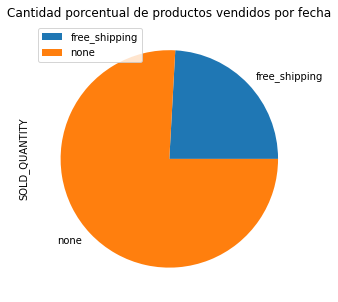

In [7]:
df_envio = df.groupby(['SHIPPING_PAYMENT_TYPE'])['SOLD_QUANTITY'].sum().reset_index()
df_envio.set_index('SHIPPING_PAYMENT_TYPE',inplace=True)
df_envio.plot.pie(y='SOLD_QUANTITY',figsize=(5,5))
plt.title('Cantidad porcentual de productos vendidos por fecha')

Si bien es natural pensar que el envío gratis es un factor que alienta a la compra de productos. El gráfico anterior permite ver que esto no es necesariamente así, y por lo tanto no hace falta mejorar nada respecto de los costos de envío.

Analizamos ahora las ganancias según la cantidad de ventas.

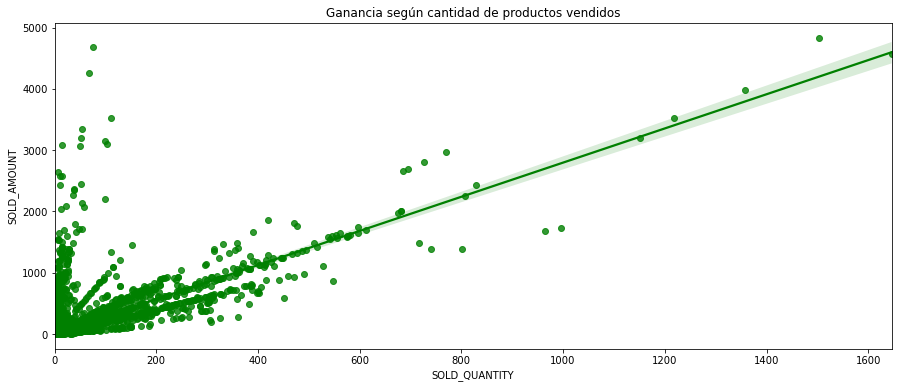

In [8]:
plt.figure(figsize=(15,6))
sns.regplot(x= 'SOLD_QUANTITY', y='SOLD_AMOUNT',data=df, color='g')
plt.title('Ganancia según cantidad de productos vendidos')
plt.show()

De este gráfico podemos deducir que son muy pocos los productos que con pocas ventas logran grandes ganancias. Es mejor tener más variedad de productos con precios no tan elevados, en lugar de muchos productos muy baratos o pocos productos muy caros. Esto es un factor a tener en cuenta a la hora de elegir con qué productos vamos a Explorar en la sección de ofertas

Podemos analizar también cual es el mejor día en la semana para publicar ofertas.

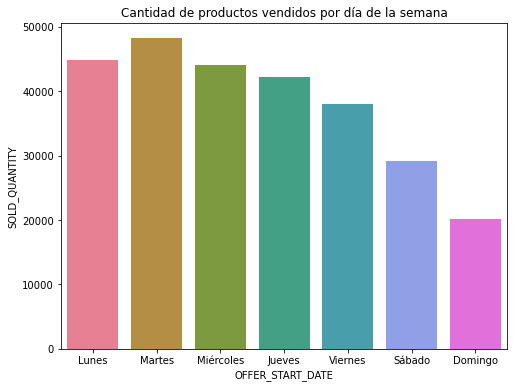

In [9]:
df_DAY_CANT = df.groupby([df.OFFER_START_DATE.dt.weekday])[['INVOLVED_STOCK','SOLD_QUANTITY']].sum().reset_index().sort_values(['OFFER_START_DATE'])
df_DAY_CANT=df_DAY_CANT.replace({0:'Lunes',1:'Martes', 2:'Miércoles', 3:'Jueves', 4:'Viernes', 5:'Sábado',6:'Domingo'})
plt.figure(figsize=(8,6))
sns.barplot(x='OFFER_START_DATE', y='SOLD_QUANTITY', data=df_DAY_CANT, palette="husl")
plt.title('Cantidad de productos vendidos por día de la semana')
plt.show()

Es notable la diferencia que hay en cantidad de ventas los domingos. ¿Será que hay menos ofertas?

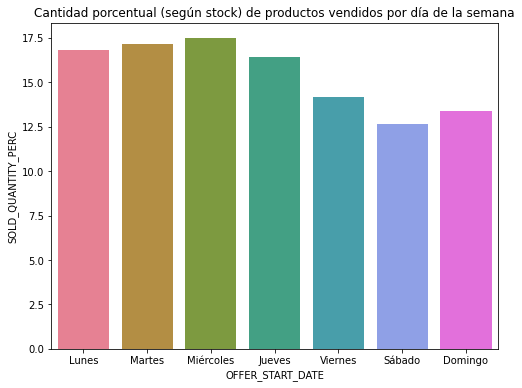

In [10]:
df_DAY_CANT['SOLD_QUANTITY_PERC']=100*df_DAY_CANT['SOLD_QUANTITY']/df_DAY_CANT['INVOLVED_STOCK']
df_DAY_CANT=df_DAY_CANT.replace({0:'Lunes',1:'Martes', 2:'Miércoles', 3:'Jueves', 4:'Viernes', 5:'Sábado',6:'Domingo'})
plt.figure(figsize=(8,6))
sns.barplot(x='OFFER_START_DATE', y='SOLD_QUANTITY_PERC', data=df_DAY_CANT, palette="husl")
plt.title('Cantidad porcentual (según stock) de productos vendidos por día de la semana')
plt.show()

Efectivamente, teniendo en cuenta la cantidad de productos publicados, el procentaje de ventas de los domingos es un poco mejor que la de los sábados. Es decir, los domingos se vende menos, pero también se publica menos. De manera análoga, notamos que los miércoles también se publican menos ofertas que los martes, y eso puede provocar que se vendan menos productos. 

Me parece interesante probar aumentar las ofertas de los domingos, en particular los domingos a la noche, ya que es un momento en el que la mayoría de las personas están en sus casas y con tiempo libre para hacer compras.

Tiene sentido analizar también cuál es el mejor horario del día para publicar.

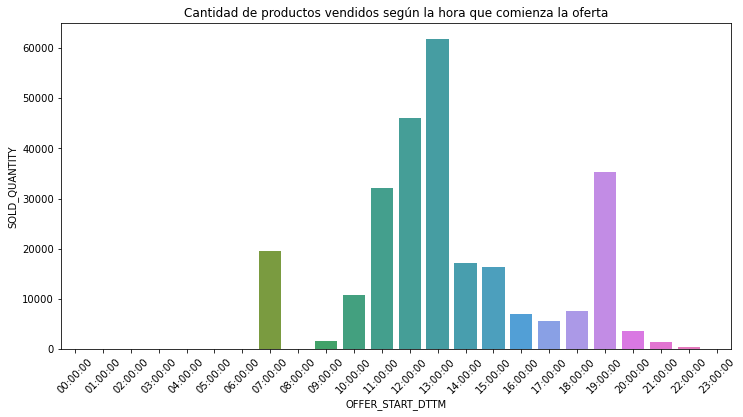

In [11]:
df_HOUR_CANT=df.groupby([df.OFFER_START_DTTM.dt.time])[['INVOLVED_STOCK','SOLD_QUANTITY']].sum().reset_index().sort_values(['OFFER_START_DTTM'])
df_HOUR_CANT['SOLD_QUANTITY_PERC']=100*df_HOUR_CANT['SOLD_QUANTITY']/df_HOUR_CANT['INVOLVED_STOCK']
plt.figure(figsize=(12,6))
sns.barplot(x='OFFER_START_DTTM', y='SOLD_QUANTITY', data=df_HOUR_CANT, palette="husl")
plt.title('Cantidad de productos vendidos según la hora que comienza la oferta')
plt.xticks(rotation=45)
plt.show()

Sin dudas de este gráfico se deduce que el mejor horario es al mediodía, sin embargo, si analizamos porcentualmente comparando con el total de productos publicados, obtenemos el siguiente gráfico.

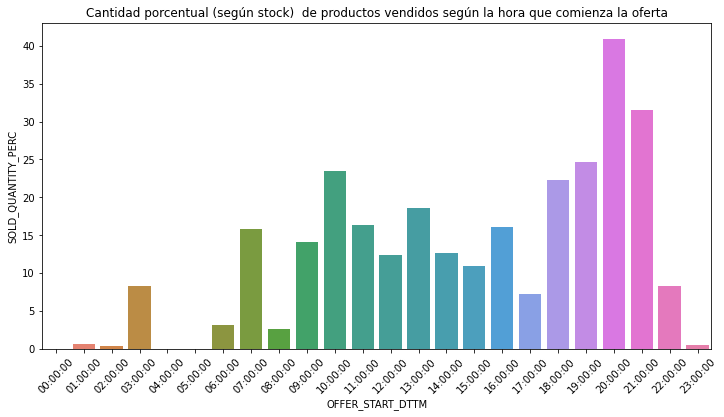

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='OFFER_START_DTTM', y='SOLD_QUANTITY_PERC', data=df_HOUR_CANT, palette="husl")
plt.title('Cantidad porcentual (según stock)  de productos vendidos según la hora que comienza la oferta')
plt.xticks(rotation=45)
plt.show()

Obviamente no tenemos acceso a los datos de en qué horario fue la venta, pero si es importante saber que si sacamos una oferta por pocas horas, quizás es conveniente publicarla a las 19:00 hs. 

Una forma de analizar algo similar, es ver la cantidad de productos que se venden según el tiempo que estuvieron publicados (directamente analizamos la cantidad porcentual de productos).

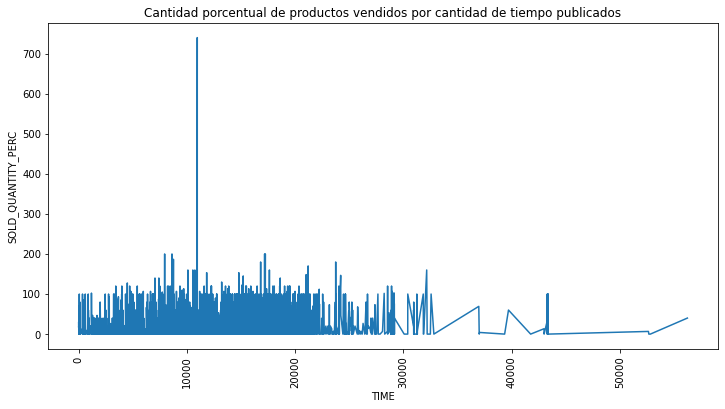

In [13]:
df['TIME']=[(df['OFFER_FINISH_DTTM']-df['OFFER_START_DTTM'])[i].total_seconds() for i in range(len(df))]
df_TIME_CANT = df.groupby(['TIME'])[['INVOLVED_STOCK','SOLD_QUANTITY']].sum().reset_index().sort_values(['TIME'])
df_TIME_CANT = df_TIME_CANT[:-1]
df_TIME_CANT['SOLD_QUANTITY_PERC']=100*df_TIME_CANT['SOLD_QUANTITY']/df_TIME_CANT['INVOLVED_STOCK']
plt.figure(figsize=(12,6))
sns.lineplot(x='TIME', y='SOLD_QUANTITY_PERC', data=df_TIME_CANT, palette="husl")
plt.title('Cantidad porcentual de productos vendidos por cantidad de tiempo publicados')
plt.xticks(rotation=90)
plt.show()

Es decir, cuando se tenga que decidir cuánto tiempo es el tiempo máximo recomendable para publicar un producto, podríamos decir que son 30000 segundos, es decir, un poco más de 8 horas. Pasado ese tiempo, no afecta de manera considerable al comportamiento de las ventas.

Por otro lado, podemos ver como se comportan las ventas según cada Vertical, como así también cuanta ganancia generan.

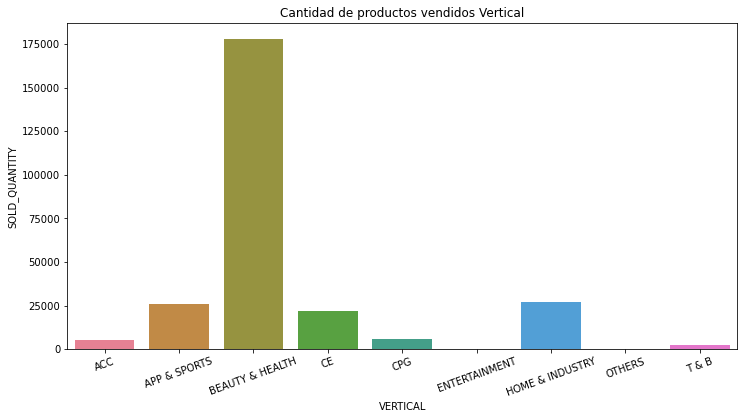

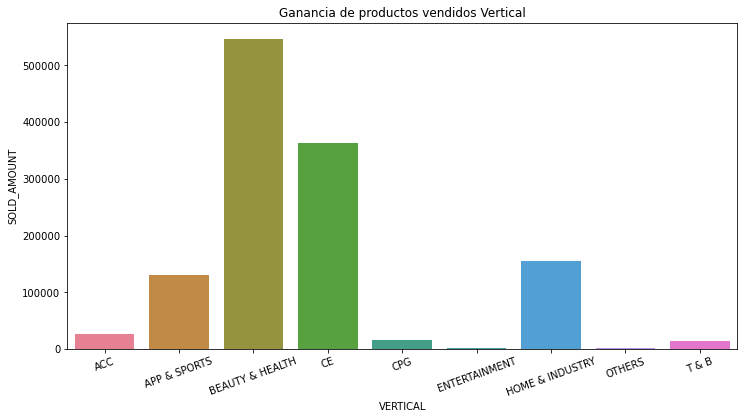

In [14]:
df_VERT_CANT = df.groupby(['VERTICAL'])[['INVOLVED_STOCK','SOLD_QUANTITY','SOLD_AMOUNT']].sum().reset_index().sort_values(['VERTICAL'])
plt.figure(figsize=(12,6))
sns.barplot(x='VERTICAL', y='SOLD_QUANTITY', data=df_VERT_CANT, palette="husl")
plt.title('Cantidad de productos vendidos Vertical')
plt.xticks(rotation=20)
plt.show()         

plt.figure(figsize=(12,6))
sns.barplot(x='VERTICAL', y='SOLD_AMOUNT', data=df_VERT_CANT, palette="husl")
plt.title('Ganancia de productos vendidos Vertical')
plt.xticks(rotation=20)
plt.show()         


Si bien se venden más productos de Beauty & Health, lo recaudado en la vertical CE es mucho más significativo. Además, si consideramos el gráfico con las cantidades porcentuales (abajo), se puede ver que en la vertical Beauty & Health se vende más porque hay más oferta, no necesariamente porque sean mejores las ofertas.

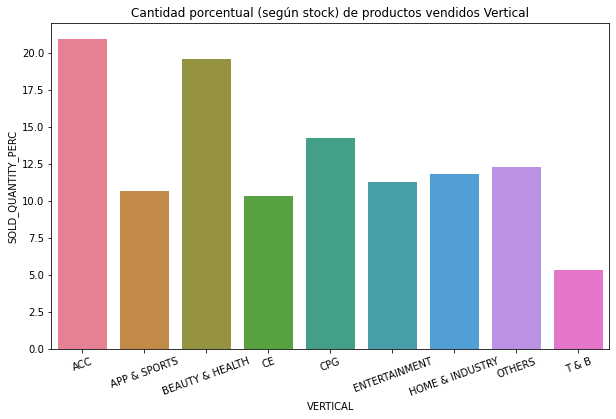

In [15]:
df_VERT_CANT['SOLD_QUANTITY_PERC']=100*df_VERT_CANT['SOLD_QUANTITY']/df_VERT_CANT['INVOLVED_STOCK']
plt.figure(figsize=(10,6))
sns.barplot(x='VERTICAL', y='SOLD_QUANTITY_PERC', data=df_VERT_CANT, palette="husl")
plt.title('Cantidad porcentual (según stock) de productos vendidos Vertical')
plt.xticks(rotation=20)
plt.show()

Esto nos permite considerar como estrategia de negocio, aumentar las ofertas en la vertical CE. 
Notamos que la vetical ACC también tiene buenos resultados en la cantidad porcentual de ventas, pero no así en la de ganancias, por lo que podría no ser conveniente aumentar la oferta en dicha vertical.

Veamos dentro de estas dos verticales (CE y Beauty & Health) cuáles dominios tiene mejores resultados.

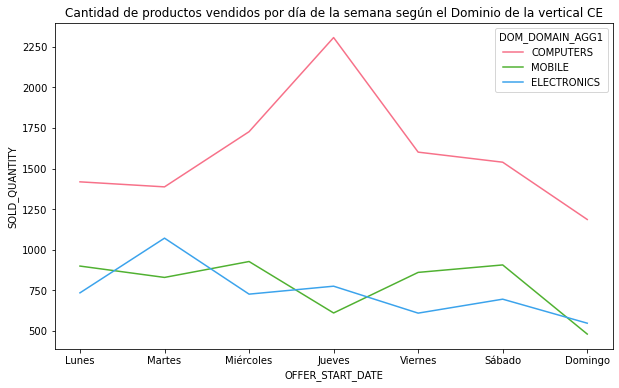

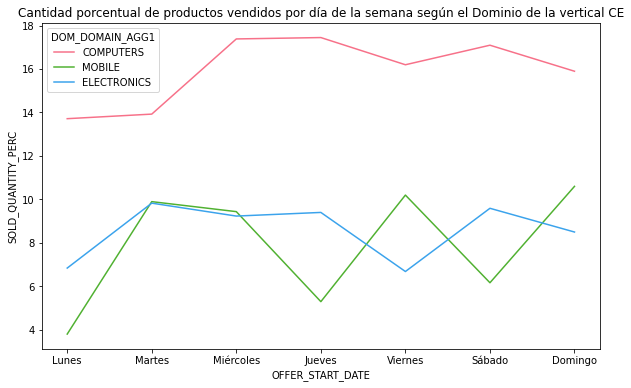

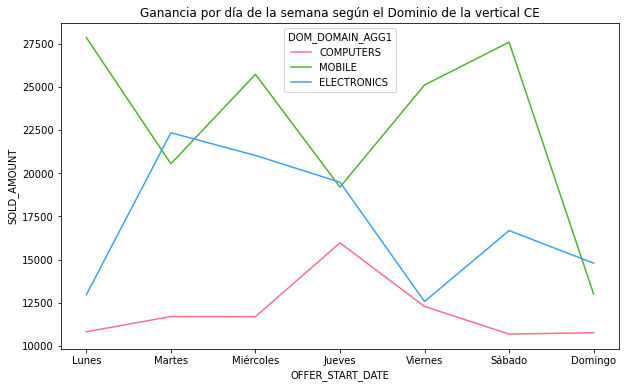

In [18]:
df_CE = df[df['VERTICAL']=='CE']
df_CE_DAY = df.groupby([df_CE.DOM_DOMAIN_AGG1,df_CE.OFFER_START_DATE.dt.weekday])[['INVOLVED_STOCK','SOLD_QUANTITY','SOLD_AMOUNT']].sum().reset_index().sort_values(['OFFER_START_DATE'])
df_CE_DAY=df_CE_DAY.replace({0:'Lunes',1:'Martes', 2:'Miércoles', 3:'Jueves', 4:'Viernes', 5:'Sábado',6:'Domingo'})
df_CE_DAY['SOLD_QUANTITY_PERC']=100*df_CE_DAY['SOLD_QUANTITY']/df_CE_DAY['INVOLVED_STOCK']

plt.figure(figsize=(10,6))
sns.lineplot(x='OFFER_START_DATE', y='SOLD_QUANTITY',data=df_CE_DAY,hue='DOM_DOMAIN_AGG1', palette="husl")
plt.title('Cantidad de productos vendidos por día de la semana según el Dominio de la vertical CE')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(x='OFFER_START_DATE', y='SOLD_QUANTITY_PERC',data=df_CE_DAY,hue='DOM_DOMAIN_AGG1', palette="husl")
plt.title('Cantidad porcentual de productos vendidos por día de la semana según el Dominio de la vertical CE')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(x='OFFER_START_DATE', y='SOLD_AMOUNT',data=df_CE_DAY,hue='DOM_DOMAIN_AGG1', palette="husl")
plt.title('Ganancia por día de la semana según el Dominio de la vertical CE')
plt.show()

Los tres gráficos son muy interesantes. En principio, notamos que se venden más computadoras que otras cosas, de hecho esto se repite cuando lo vemos porcentualmente. 

Respecto de qué rinde más, claramente conviene promover celulares, ya que las computadoras son lo que menos rinde.

Si se tuviera que elegir un día de la semana para promover computadoras, sugeriría los jueves. Miércoles y viernes elegiría celulares, y por último los martes y sábados Electronics. Los domingos son buenos días para explotar. 

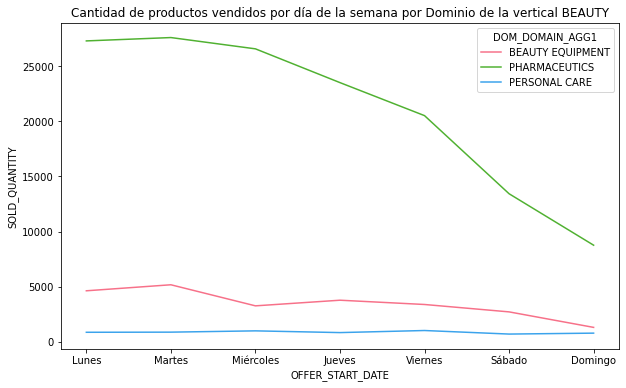

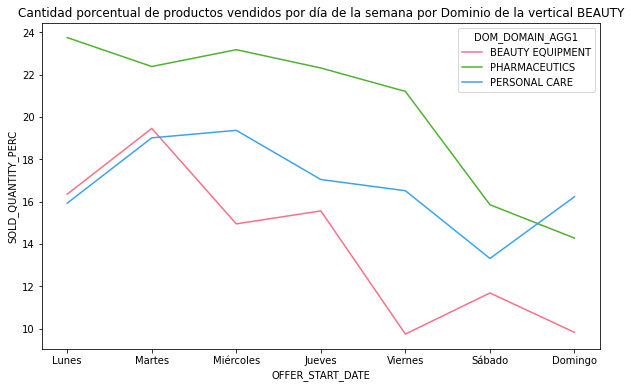

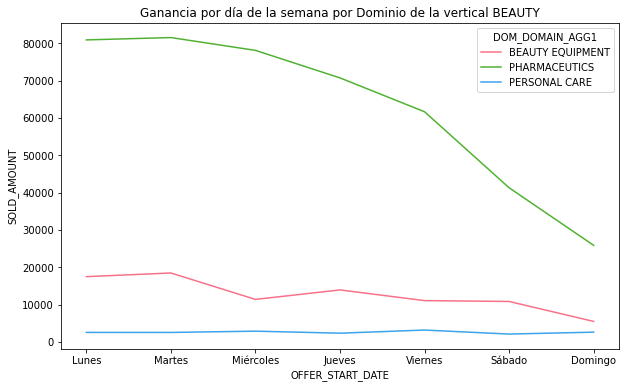

In [17]:
df_BEAUTY = df[df['VERTICAL']=='BEAUTY & HEALTH']
df_BEAUTY_DAY = df.groupby([df_BEAUTY.DOM_DOMAIN_AGG1,df_BEAUTY.OFFER_START_DATE.dt.weekday])[['INVOLVED_STOCK','SOLD_QUANTITY','SOLD_AMOUNT']].sum().reset_index().sort_values(['OFFER_START_DATE'])
df_BEAUTY_DAY=df_BEAUTY_DAY.replace({0:'Lunes',1:'Martes', 2:'Miércoles', 3:'Jueves', 4:'Viernes', 5:'Sábado',6:'Domingo'})
df_BEAUTY_DAY['SOLD_QUANTITY_PERC']=100*df_BEAUTY_DAY['SOLD_QUANTITY']/df_BEAUTY_DAY['INVOLVED_STOCK']

plt.figure(figsize=(10,6))
sns.lineplot(x='OFFER_START_DATE', y='SOLD_QUANTITY',data=df_BEAUTY_DAY,hue='DOM_DOMAIN_AGG1', palette="husl")
plt.title('Cantidad de productos vendidos por día de la semana por Dominio de la vertical BEAUTY')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(x='OFFER_START_DATE', y='SOLD_QUANTITY_PERC',data=df_BEAUTY_DAY,hue='DOM_DOMAIN_AGG1', palette="husl")
plt.title('Cantidad porcentual de productos vendidos por día de la semana por Dominio de la vertical BEAUTY')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(x='OFFER_START_DATE', y='SOLD_AMOUNT',data=df_BEAUTY_DAY,hue='DOM_DOMAIN_AGG1', palette="husl")
plt.title('Ganancia por día de la semana por Dominio de la vertical BEAUTY')
plt.show()

En esta vertical los números son más parejos. Obviamente Pharmaceutics recauda más porque vende más. Según cada día de la semana, creo que los lunes, miércoles y jueves conviene promover el dominio Pharmaceutics, los martes y sábados Beauty Equipment y los miércoles viernes y domingos Personal Care.